__Ejercicio 1__. Escribe una función `derivadaNumerica` que
reciba: una función $f\colon \mathbb{R}\mapsto\mathbb{R}$,
un punto $x_0\in\mathbb{R}$ y un número $h\in\mathbb{R}$. Esta función deberá calcular una aproximación a la
derivada utilizando la definición indicada arriba ignorando
la parte del límite. Es decir, algo como: `derivada_numerica(f,x,h)`.

In [1]:
#definimos la función
function derivada_numerica(f,x,h)
    #simplemente aplicamos la definición sin la parte del límite y lo guardamos como "d"
    d=(f(x+h)-f(x))/h
    #la función regresa el valor de d
    return d
end;

Ejemplo. Consideremos $g(x)=x^{5}$

In [2]:
g(x)=x^5;

In [3]:
derivada_numerica(g,1,0.001)

5.010010005000343

Sabemos que $g'(1)=5$, por lo que la aproximación al menos es correcta en las primeras dos cifras.


__Ejercicio 2__. Utiliza tu función `derivadaNumerica` para
calcular la derivada de la función $\cos$ en un punto
$x_0\in[0,1)$. Compara tu resultado con el que indica el
cálculo exacto. Utiliza valores de $h$ cada vez más pequeños, grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos $h$'s cada vez más pequeño. Para ello pueden graficar el resultado de la derivada numérica contra $1/h$.
Observa el resultado de la aproximación y comenta. ¿El error es del orden de $h$?, para ver esto grafica el error relativo a $f'(x_0)$:
$$\epsilon=\frac{\Delta f(x_0,h)/h-f'(x_0)}{f'(x_0)},$$
respecto a $h$.

In [4]:
#definimos
f(x)=cos(x);

In [5]:
#Definimos un arreglo de 400 entradas para diferentes valores de h

#Primero definimos h como un arreglo de zeros
h=zeros(400)

#Usamos el for para ir guardando en cada etrada de h números cada vez más pequeños, de la forma 1/i
for i in 1:400
    h[i]=1/i
end

Sabemos que $f'(x)=-sin(x)$. Escogemos $x_{0}=0.5$.

In [6]:
#Definimos a como el valor real de la derivada a "a"
a=-sin(0.5)

-0.479425538604203

In [7]:
using PyPlot

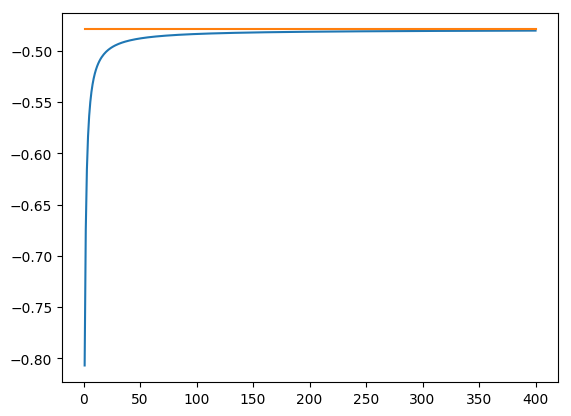

In [8]:
#usamos plot para graficar 1/h y los diferentes valores de la derivada numérica, tomando las distintas entradas de h. Para ello usamos .^ y derivada_numerica.()

plot(h.^(-1),derivada_numerica.(f,0.5,h))

#Graficamos una linea horizontal y=a, para ello basta tomar los dos puntos extremos 
plot([1,400],[a,a])

show();

In [14]:
#calculamos el error con la fórmula dada arriba. En realidad definimos "er" como un arreglo de errores, evaluando la derivada en el arreglo h.

er=abs.((derivada_numerica.(f,0.5,h)-a)/a);

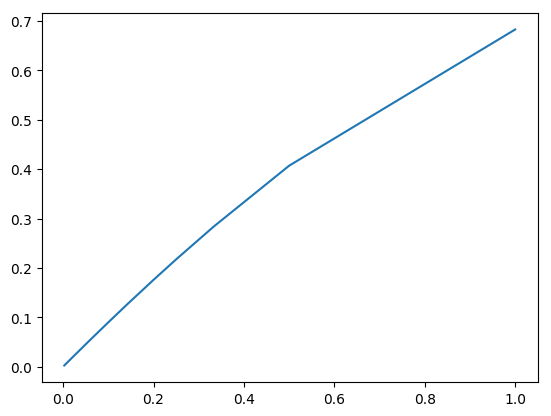

In [15]:
#Hacemos la gráfica de e respecto a h
plot(h,er);

Notamos que la gráfica es casi una recta con pendiente cercana a 1, por lo cual podemos concluir que el error es del orden de $h$.

__Ejercicio 3__. Teniendo en mente la serie de Taylor para $f(x+h)$ ¿existe
alguna forma de mejorar el cálculo de la derivada numérica? Comenta.

__Tip:__ ¿Que pasa con los términos pares de la serie cuando la calculamos para $f(x-h)$?, ¿Como podemos despejar la derivada exacta de $f$ combinando ambas series? 

__Nota:__ Entregar en $\LaTeX$ en el notebook de la tarea.

#### Respuesta
Consideremos $v_{x}(h)=f(x+h)$.
Por el teorema de Taylor, centrando el polinomio en cero, tenemos que

$$v_{x}(h)=v_{x}(0)+v'_{x}(0)h + \frac{1}{2}v''_{x}(0) h^2 + R_{3,v} ,$$ donde $R_{3,v}=\frac{1}{6}v'''_{x}(t_{1}) h^3$ para algún $t_{1}$ tal que $t_{1} \in (0,h)$.

Reescribiendo lo anterior en términos de $f$, tenemos que

$$ f(x+h)=f(x)+f'(x)h+\frac{1}{2}f''(x) h^2 + \frac{1}{6}f'''(s_{1}) h^3,     ...(1)$$

donde $s_{1} \in (x,x+h)$.

Ahora consideremos $w_{x}(h)=f(x-h)$. De forma análoga, se tiene que
$$w_{x}(h)=w_{x}(0)+w'_{x}(0)h + \frac{1}{2}w''_{x}(0) h^2 + R_{3,w} ,$$ donde $R_{3,w}=\frac{1}{6}w'''_{x}(t_{2}) h^3$ para algún $t_{2}$ tal que $t_{1} \in (-h,0)$.

Reescribiendo lo anterior en términos de $f$,
$$ f(x-h)=f(x)-f'(x)h+\frac{1}{2}f''(x) h^2 - \frac{1}{6}f'''(s_{2}) h^3,     ...(2)$$

donde $s_{2} \in (x-h,x)$.

Restando la ecuación (2) de la ecuación (1), se tiene que

$$f(x+h)-f(x-h)=2hf'(x)+ \frac{h^3}{6}(f'''(s_{1})-f'''(s_{2}))$$

Pero, por el teorema del valor medio, debe existir $s \in(x-h,x+h)$ tal que $$f'''(s)=\frac{1}{2} (f'''(s_{1})+f'''(s_{2})).$$

Entonces, $f(x+h)-f(x-h)=2hf'(x)+ \frac{h^3}{3}f'''(s)$.

Por lo tanto 
$$f'(x)=\frac{f(x+h)-f(x-h)}{2h} -\frac{h^2}{6}f'''(s).$$

De este modo, vemos que el error ahora es $-\frac{h^2}{6}f'''(s)$. El cual es del orden de $h^2$, por lo cual será menor que el error anterior (del orden de $h$) siempre que tomemos $h<<1$.


__Pregunta:__ ¿Hay una forma de construir una derivada numérica aún mas exacta sin tener que hacer $h$ arbitrariamente pequeño?, ¿que opinas?

No. Al hacer una derivada numérica, la precisión siempre dependerá de $h$. 
Podríamos hacer métodos más exactos, cuyos errores dependieran de $h^3$ o de $h^4$ (de forma análoga a lo que acabamos de hacer), pero al final siempre es necesario tomar h's pequeñas.

__Ejercicio 4__. Implementa la _derivada
simétrica_ en `Julia` como `derivada_Simetrica` y repite la
comparativa que realizaste en el __ejercicio 2__.


In [16]:
function derivada_simetrica(f,x,h)
    d=(f(x+h)-f(x-h))/(2*h)
    return d
end;

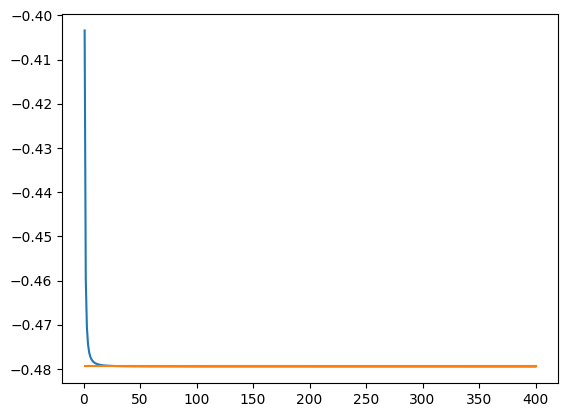

In [17]:
plot(h.^(-1),derivada_simetrica.(f,0.5,h))
plot([1,400],[a,a])
show();

In [18]:
esim=abs.((derivada_simetrica.(f,0.5,h)-a)/a);

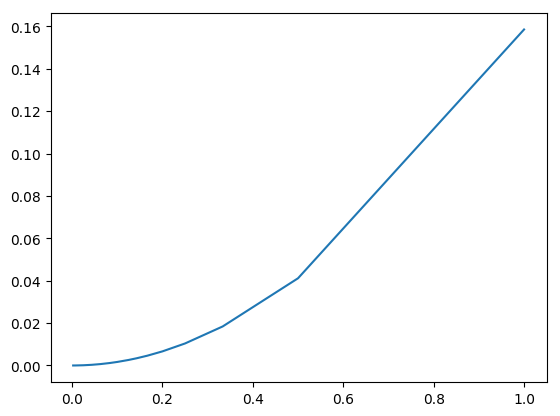

In [19]:
plot(h,esim);

__Ejercicio 5:__ Demuestre que $\Delta_h$ es un operador lineal y que podemos "factorizar" la función a la derecha del operador. Hecho esto podemos quitar de ambos lados la función $f$ para obtener lo siguiente:
$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$

#### Demostración

Consideremos las funciones $f$ y $g$ y sean $a,b \in \mathbb{R}$

Veamos que,
\begin{eqnarray}
\Delta_h (af(x)+bg(x))&=&\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }} (af(x)+bg(x))\\
&=& \sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}(af(x)) +\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}(bg(x)) \\ 
&=& a \sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}f(x) + b \sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}g(x) \\
&=& a\Delta_h f(x) + b\Delta_h g(x)
\end{eqnarray}

Donde hemos utilizado que las derivadas de cualquier orden son operadores lineales, es decir, $$ \left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }} af+bg=a\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}f+b\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}g.$$

Por lo tanto, $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$ es un operador lineal.

__Ejercicio 6:__ Para saber como se relaciona el _operador derivada exacta_ con el _operador diferencia finita hacia adelante_ es necesario invertir la serie $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$. Una forma directa de hacerlo es identificar la función para la cual es esa serie. Entonces, pensando en el operador derivada como un número, la serie se identifica como función evaluada en $\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$, ¿cual es esa función?. Si llamamos $\phi$ a dicha función, deberiamos de tener una relación de la siguiente forma:
$$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$.
    
* __Nota:__ En la clase se demostró que $\phi(x)=e^x-1$, escriba el razonamiento en $\LaTeX$ de como se llegó a esto.

#### Respuesta
 Consideremos el operador $\alpha=\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$.
 
 Veamos que 
 $$ e^{\alpha}=\sum_{0}^{\infty} \frac{1}{n!} \alpha^{n},$$
 donde hemos expandido la función exponencial en su serie de Taylor.
 
\begin{eqnarray}
\implies e^{\alpha}&=& \sum_{0}^{\infty} \frac{1}{n!} \left. h^{n}\frac{d^{n}}{d_\xi^{n}}\right|_{\substack{ \xi=x }}\\
 &=&1+\sum_{1}^{\infty} \frac{1}{n!} \left. h^{n}\frac{d^{n}}{d_\xi^{n}}\right|_{\substack{ \xi=x }}
 \end{eqnarray}
 
 $$\implies \sum_{1}^{\infty} \frac{1}{n!} \left. h^{n}\frac{d^{n}}{d_\xi^{n}}\right|_{\substack{ \xi=x }}= e^{\alpha}-1 $$
 
 $$ \implies \Delta_{h}= \phi(\alpha)=e^{\alpha}-1 $$
 
$$ \therefore \      \phi(x)=e^x-1$$

__Ejercicio 7:__ Explotar la relación $\delta_h=\Delta_h-\Delta_{-h}$, donde $\delta_h:f(x)\mapsto f(x+h)-f(x-h)$, para encontrar cual es la función $\theta$ que relaciona a $\delta_h$ con el operador derivada exacta, es decir:
$$\delta_h=\theta\left(h\left. \frac{d}{d\xi}\right|_{\xi=x}\right).$$

Una vez que la encuentren, despejen $\left. \frac{d}{d\xi}\right|_{\xi=x}$ y calculen la serie de Taylor de mánera similar a lo mostrado en las ecuaciones 3 y 4.

#### Respuesta

Recordemos nuestra definición  $\alpha=\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$. Y del ejercicio anterior, tenemos que $\Delta_{h}=e^{\alpha}-1$.

De las observaciones anteriores, podemos ver que  $\Delta_{-h}=e^{-\alpha}-1$

Así, $$\delta_{h}=\Delta_{h}-\Delta_{-h}= e^{\alpha}-1-(e^{-\alpha}-1)=e^{\alpha}-e^{-\alpha}=2 sinh(\alpha) $$

$$\implies \delta_{h}= \theta(\alpha)= 2 sinh(\alpha)$$

$$\implies \theta(x)=2 sinh(x).$$

De este modo, despejando $\alpha$ tenemos que 
$$ \alpha=sinh^{-1}(\frac{\delta_{h}}{2})$$

$$\implies \left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}=sinh^{-1}(\frac{\delta_{h}}{2})$$

$$\implies \ \left.\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}=\frac{1}{h}sinh^{-1}(\frac{\delta_{h}}{2})$$

Y sabemos que $sinh^{-1}(x)=ln\left( x+\sqrt{x^2+1} \right)$
$$\therefore \ \left.\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}= \frac{1}{h} ln\left(\frac{\delta_{h}}{2}+\sqrt{\left(\frac{\delta_{h}}{2}\right)^2+1} \right) $$

Y tomando los primeros términos de la serie de Taylor de $ln\left(\frac{\delta_{h}}{2}+\sqrt{\left(\frac{\delta_{h}}{2}\right)^2+1}\right)$ alrededor de cero tenemos

$$\left.\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}= \frac{1}{h}\left(\frac{\delta_{h}}{2}-\frac{1}{6}\left(\frac{\delta_{h}}{2}\right)^3+ \frac{3}{40}\left(\frac{\delta_{h}}{2}\right)^5 - \frac{5}{112}\left(\frac{\delta_{h}}{2}\right)^7+\dots\right)$$